# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

caminho_do_arquivo_csv = r'C:\Users\Administrador\OneDrive\Desktop\EBAC\Cientista de dados\demo01.csv'
titanic = pd.read_csv(caminho_do_arquivo_csv)

titanic.reset_index(drop=True, inplace=True)
titanic= titanic.dropna(axis=1)

tipo_renda = {'Student': 1, 'Pensioner': 2, 'Commercial associate': 3, 'Working': 4, 'State servant': 5}
titanic['tipo_renda'] = titanic['tipo_renda'].map(tipo_renda)
map_educacao = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
titanic['educacao'] = titanic['educacao'].map(map_educacao)
estado_civil = {'Single / not married': 1, 'Married': 2, 'Civil marriage': 3, 'Widow': 4, 'Separated': 5}
titanic['estado_civil'] = titanic['estado_civil'].map(estado_civil)
tipo_residencia = {'House / apartment': 1, 'Municipal apartment': 2, 'Rented apartment': 3, 'With parents': 4, 'Office apartment': 5, 'Co-op apartment': 6}
titanic['tipo_residencia'] = titanic['tipo_residencia'].map(tipo_residencia)

variaveis = list(titanic.columns)
tipos_de_dados = titanic.dtypes.tolist()
metadados = pd.DataFrame({'Variável': variaveis, 'Tipo de Dados': tipos_de_dados})
qtd_categorias = []
for coluna in variaveis:
    qtd_categorias.append(titanic[coluna].nunique())
metadados['qtd_categorias'] = qtd_categorias
print(metadados)

variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'possui_email', 'mau','possui_celular','possui_fone_comercial','possui_fone']

titanic = pd.get_dummies(titanic, columns=variaveis_qualitativas, drop_first=True)

titanic_dumies=pd.get_dummies(titanic)
titanic_dumies.dtypes


                 Variável Tipo de Dados  qtd_categorias
0                    sexo        object               2
1        posse_de_veiculo        object               2
2         posse_de_imovel        object               2
3              qtd_filhos         int64               8
4              tipo_renda         int64               5
5                educacao         int64               5
6            estado_civil         int64               5
7         tipo_residencia         int64               6
8                   idade       float64            5298
9           tempo_emprego       float64            3005
10         possui_celular         int64               1
11  possui_fone_comercial         int64               2
12            possui_fone         int64               2
13           possui_email         int64               2
14  qt_pessoas_residencia       float64               9
15                    mau          bool               2


qtd_filhos                   int64
tipo_renda                   int64
educacao                     int64
estado_civil                 int64
tipo_residencia              int64
idade                      float64
tempo_emprego              float64
qt_pessoas_residencia      float64
sexo_M                        bool
posse_de_veiculo_Y            bool
posse_de_imovel_Y             bool
possui_email_1                bool
mau_True                      bool
possui_fone_comercial_1       bool
possui_fone_1                 bool
dtype: object

In [69]:
X = titanic_dumies.drop('mau_True', axis=1)
y = titanic_dumies['mau_True']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

print("Formato de X_train:", X_train.shape)
print("Formato de X_valid:", X_valid.shape)
print("Formato de y_train:", y_train.shape)
print("Formato de y_valid:", y_valid.shape)

Formato de X_train: (11655, 14)
Formato de X_valid: (4995, 14)
Formato de y_train: (11655,)
Formato de y_valid: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

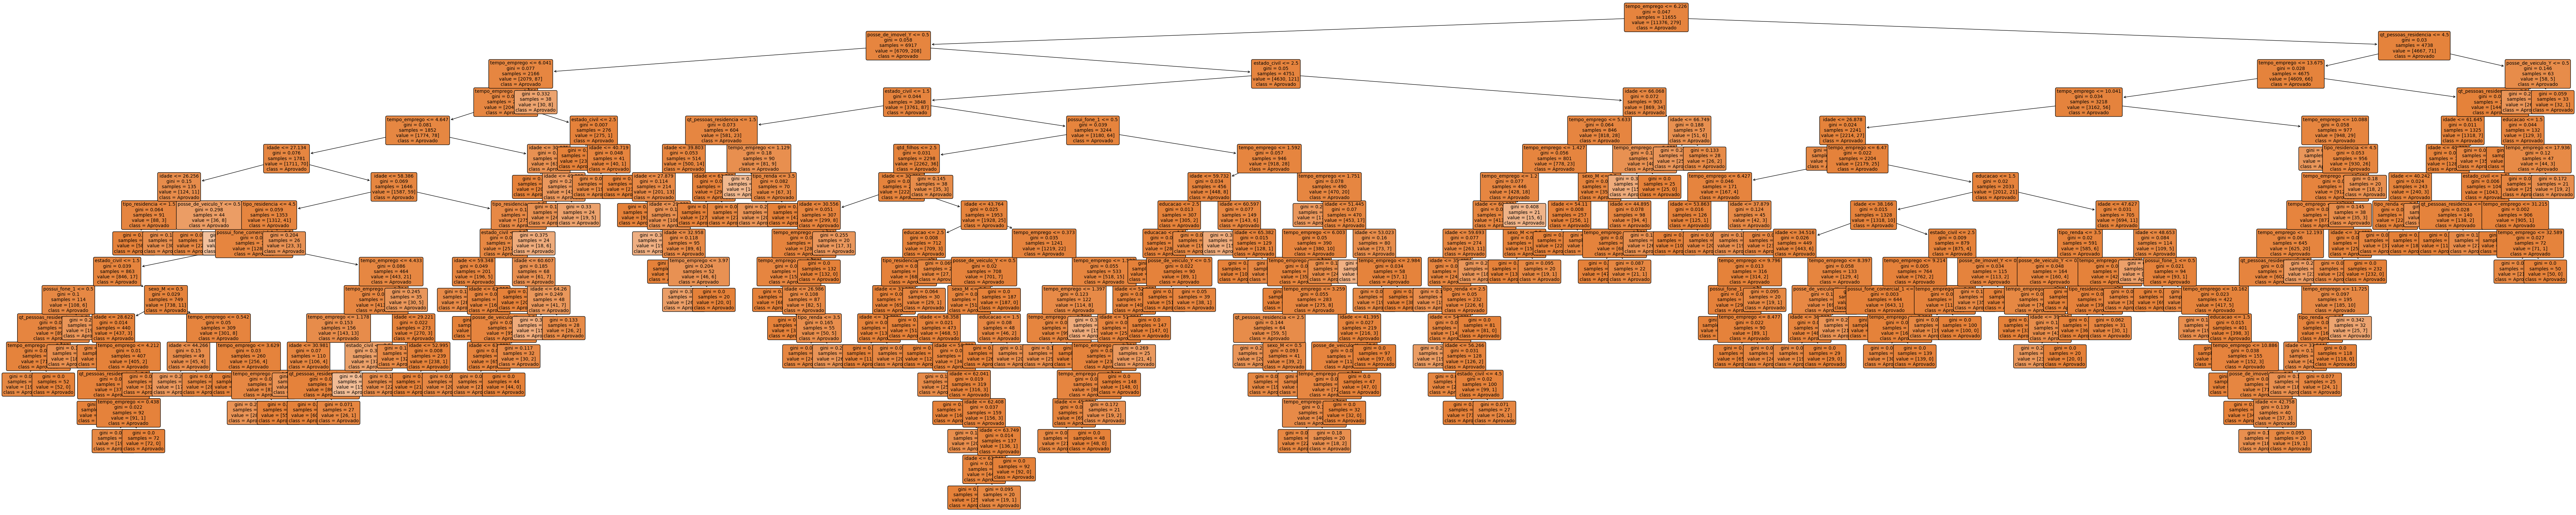

In [81]:
from sklearn.tree import plot_tree
#1
modelo_arvore_decisao = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
#2
modelo_arvore_decisao.fit(X_train, y_train)
#3
plt.figure(figsize=(100, 20))

plot_tree(modelo_arvore_decisao,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns,
          rounded=True,
          fontsize=10)

plt.show()

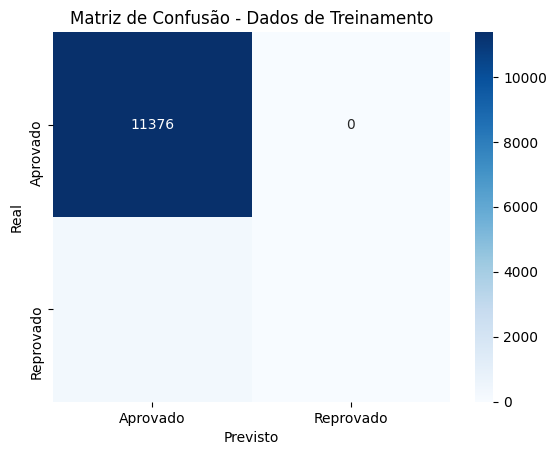

In [83]:
#4
from sklearn.metrics import confusion_matrix

previsoes_treinamento = modelo_arvore_decisao.predict(X_train)

matriz_confusao = confusion_matrix(y_train, previsoes_treinamento)

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Dados de Treinamento')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

#5
acuracia_treinamento = accuracy_score(y_train, previsoes_treinamento)
print(f'Acurácia na base de treinamento: {acuracia_treinamento * 100:.2f}%')

Acurácia na base de treinamento: 97.61%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

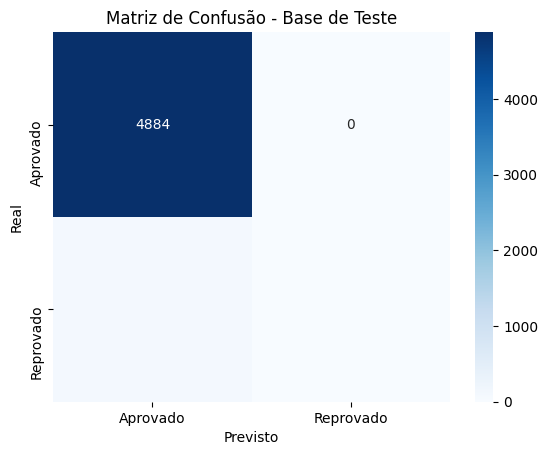

In [73]:
#1
previsoes_teste = modelo_arvore_decisao.predict(X_valid)
#2
matriz_confusao_teste = confusion_matrix(y_valid, previsoes_teste)

sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

In [74]:
#3
acuracia_teste = accuracy_score(y_valid, previsoes_teste)
print(f'Acurácia na base de teste: {acuracia_teste * 100:.2f}%')

Acurácia na base de teste: 97.78%


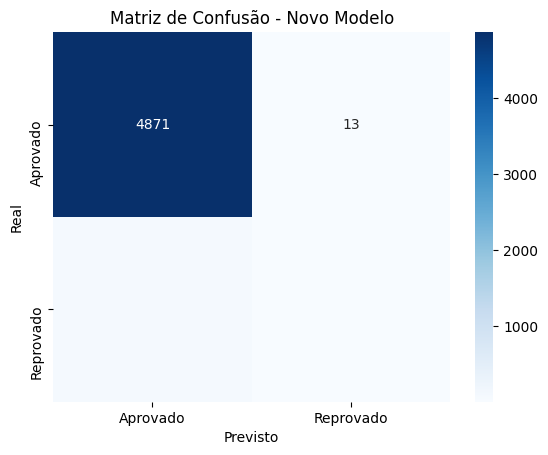

Proporção de proponentes classificados como "maus": 0.46%


In [75]:
#4
modelo_arvore_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

modelo_arvore_nova.fit(X_train, y_train)

previsoes_nova_arvore = modelo_arvore_nova.predict(X_valid)

matriz_confusao_nova_arvore = confusion_matrix(y_valid, previsoes_nova_arvore)

sns.heatmap(matriz_confusao_nova_arvore, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovado', 'Reprovado'], yticklabels=['Aprovado', 'Reprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

proporcao_maus_nova_arvore = sum(previsoes_nova_arvore) / len(previsoes_nova_arvore)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus_nova_arvore * 100:.2f}%')

In [76]:
#5
todos_bons = [0] * len(previsoes_nova_arvore)

acuracia_todos_bons = accuracy_score(y_valid, todos_bons)
print(f'Acurácia se classificasse todos os contratos como "bons": {acuracia_todos_bons * 100:.2f}%')

Acurácia se classificasse todos os contratos como "bons": 97.78%
